In [54]:
import numpy as np
import pandas as pd
import imblearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
%matplotlib inline


In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/5unof4Beach/IOT-2022/master/city_day.csv')
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


Data Cleansing

In [57]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [58]:
df.isna().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [59]:
df.drop_duplicates(keep='first', inplace=True)
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [60]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [61]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [81]:
print(df.columns.difference([df.columns[-1]], sort=False)) 

for x in df.columns.difference([df.columns[-1]], sort=False):
    df[x] = pd.to_numeric(df[x], errors='coerce')
    df[x] = df[x].fillna(0)

df[df.columns[-1]] = df[df.columns[-1]].fillna(0)
print(df)

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')
       City  Date  PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2  \
0       0.0   0.0   0.00   0.00   0.92  18.22  17.15   0.00   0.92  27.64   
1       0.0   0.0   0.00   0.00   0.97  15.69  16.46   0.00   0.97  24.55   
2       0.0   0.0   0.00   0.00  17.40  19.30  29.70   0.00  17.40  29.07   
3       0.0   0.0   0.00   0.00   1.70  18.48  17.97   0.00   1.70  18.59   
4       0.0   0.0   0.00   0.00  22.10  21.42  37.76   0.00  22.10  39.33   
...     ...   ...    ...    ...    ...    ...    ...    ...    ...    ...   
29526   0.0   0.0  15.02  50.94   7.68  25.06  19.54  12.47   0.47   8.55   
29527   0.0   0.0  24.38  74.09   3.42  26.06  16.53  11.99   0.52  12.72   
29528   0.0   0.0  22.91  65.73   3.45  29.53  18.33  10.71   0.48   8.42   
29529   0.0   0.0  16.64  49.97   4.05  29.26  18.80  10.03   0.52   9.84  

In [82]:
df[df.columns[-1]].unique()

array([0, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [64]:
target = 'PM2.5'
features = [x for x in df.columns if x not in target]
print(features)

['City', 'Date', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


In [65]:
def var(x):
  s = 0
  for item in x:
    s+= (item-np.mean(x)) ** 2
  return s / (len(x)-1)

def cov(x, y):
  s = 0
  for i in range(0, len(x)):
    s+= (x[i] -np.mean(x)) * (y[i]-np.mean(y))
  return s / (len(x)-1)


def cor(x, y):
  return cov(x,y) / np.sqrt(var(x) * var(y))

In [66]:
# df_drop = df.drop([df.index[i] for i in range(500, len(df))])
df_drop = df.drop([df.columns[i] for i in range(-1,2)], axis=1) 
df_drop = df_drop.head(10000)
df_drop 

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.00,0.00,0.92,18.22,17.15,0.00,0.92,27.64,133.36,0.00,0.02,0.00,0.0
1,0.00,0.00,0.97,15.69,16.46,0.00,0.97,24.55,34.06,3.68,5.50,3.77,0.0
2,0.00,0.00,17.40,19.30,29.70,0.00,17.40,29.07,30.70,6.80,16.40,2.25,0.0
3,0.00,0.00,1.70,18.48,17.97,0.00,1.70,18.59,36.08,4.43,10.14,1.00,0.0
4,0.00,0.00,22.10,21.42,37.76,0.00,22.10,39.33,39.31,7.01,18.89,2.78,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,37.65,50.65,11.44,29.58,41.05,3.36,0.53,10.52,37.11,0.00,0.00,0.00,83.0
9996,52.48,61.45,12.21,31.26,43.46,3.19,0.58,12.90,47.02,0.00,0.00,0.00,74.0
9997,37.83,47.30,10.56,26.77,37.34,3.39,0.45,14.87,44.47,0.00,0.00,0.00,84.0
9998,43.18,49.36,11.09,28.47,39.56,3.44,0.47,12.56,37.82,0.00,0.00,0.00,67.0


In [67]:
df_drop.isna().sum()

PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [68]:
corr_matrix = df_drop.corr()
# for col1 in df_drop.columns.values:
#   val = []
#   for col2 in df_drop.columns.values:
#     val.append(cor(df_drop[col1], df_drop[col2]))
#   corr_matrix.append(val)
print(corr_matrix)

            PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PM2.5    1.000000  0.359226  0.328798  0.367870  0.422568  0.092104  0.284824   
PM10     0.359226  1.000000  0.159386  0.170661  0.234826 -0.027672 -0.111339   
NO       0.328798  0.159386  1.000000  0.435174  0.733986  0.008748  0.577373   
NO2      0.367870  0.170661  0.435174  1.000000  0.741962 -0.089670  0.583791   
NOx      0.422568  0.234826  0.733986  0.741962  1.000000 -0.043845  0.590940   
NH3      0.092104 -0.027672  0.008748 -0.089670 -0.043845  1.000000 -0.162518   
CO       0.284824 -0.111339  0.577373  0.583791  0.590940 -0.162518  1.000000   
SO2      0.308342 -0.017363  0.328565  0.681095  0.541739 -0.160680  0.615216   
O3       0.247372  0.143400  0.083313  0.338219  0.234846  0.050391  0.131757   
Benzene  0.068432  0.004542  0.111186  0.094970  0.128966 -0.000155  0.143832   
Toluene  0.187360 -0.051204  0.261359  0.502937  0.417564 -0.139834  0.522645   
Xylene   0.193045  0.125367 

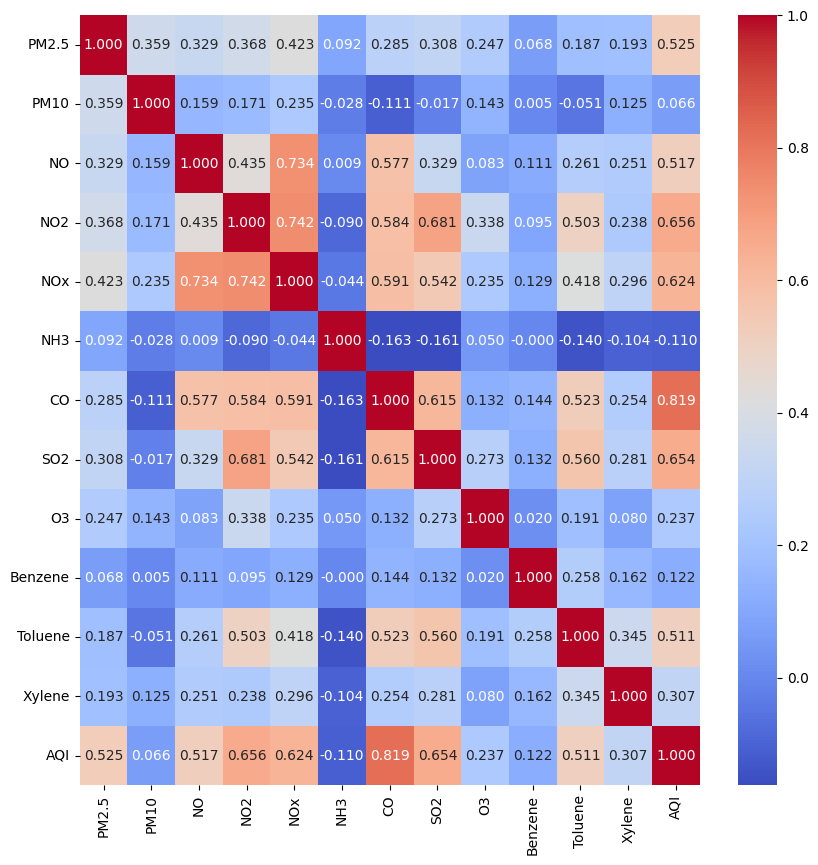

In [69]:
sns.heatmap(corr_matrix,annot = True,cmap='coolwarm',fmt='.3f', xticklabels=df_drop.columns, yticklabels=df_drop.columns)
figure= plt.gcf()
figure.set_size_inches(10,10)
plt.show()

Liệt kê chỉ số tương quan của các cặp từ nhỏ đến lớn

In [70]:
corr_matrix.unstack().sort_values().drop_duplicates()

CO     NH3       -0.162518
SO2    NH3       -0.160680
NH3    Toluene   -0.139834
PM10   CO        -0.111339
NH3    AQI       -0.110416
                    ...   
NO2    SO2        0.681095
NOx    NO         0.733986
       NO2        0.741962
AQI    CO         0.818834
PM2.5  PM2.5      1.000000
Length: 79, dtype: float64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20671, 15) (8860, 15) (20671,) (8860,)


In [72]:
len(df)
X_drop = df.drop([df.index[i] for i in range(10000, len(df))])
X_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        10000 non-null  float64
 1   Date        10000 non-null  float64
 2   PM2.5       10000 non-null  float64
 3   PM10        10000 non-null  float64
 4   NO          10000 non-null  float64
 5   NO2         10000 non-null  float64
 6   NOx         10000 non-null  float64
 7   NH3         10000 non-null  float64
 8   CO          10000 non-null  float64
 9   SO2         10000 non-null  float64
 10  O3          10000 non-null  float64
 11  Benzene     10000 non-null  float64
 12  Toluene     10000 non-null  float64
 13  Xylene      10000 non-null  float64
 14  AQI         10000 non-null  float64
 15  AQI_Bucket  8640 non-null   object 
dtypes: float64(15), object(1)
memory usage: 1.2+ MB


In [73]:
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(X_drop[features].values, X_drop[target].values, test_size=0.3, random_state=42)
print(X_train_drop.shape,X_test_drop.shape,y_train_drop.shape,y_test_drop.shape)

(7000, 15) (3000, 15) (7000,) (3000,)


In [74]:
def BuildConfusionMatrix(y_test,pred):
  TP = 0
  FP = 0
  TN = 0
  FN = 0
  for i in range(len(y_test)):
    if (y_test[i]==pred[i]):
        if pred[i] == 1:
              TP += 1
        else:
              TN += 1
    else:
        if pred[i]==1:
            FP += 1
        else:
            FN += 1
  return [TN,FP,FN,TP]

Sklearn

KNN - Phùng Đức Cường (B19DCCN090)

In [75]:
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(X_drop[features], X_drop[target], test_size=0.3, random_state=42)
print(X_train_drop.shape,X_test_drop.shape,y_train_drop.shape,y_test_drop.shape)

(7000, 15) (3000, 15) (7000,) (3000,)


In [76]:
import math

def euclide_distance(x1, x2):
  distance = 0.0
  for i in range(len(x1)):
    distance += (x1[i] - x2[i]) ** 2
  return math.sqrt(distance)

class KNNClassification:
  def __init__(self, k):
    self.k = k

  def fit(self, X, y):
    self.X_train = X
    self.y_train = y

  def predict(self, X):
    predictions = [self.do_predict(x) for x in X.values]
    return predictions

  def do_predict(self, x):
    # Tinh khoang cach euclide
    index = 0
    distances = list()
    for x_train in self.X_train.values:
      dist = euclide_distance(x, x_train)
      distances.append((index, dist))
      index += 1


    # Sap xep theo khoang cach euclide tang dan
    distances.sort(key=lambda x: x[1])

    # Lay ra K neighbors gan nhat
    index_neighbors = list()
        
    for i in range(self.k):
      index_neighbors.append(distances[i][0])

      # Lay ra labels cua K neighbors
       
    labels = list()
    count = 0
    for value in self.y_train.values:
      if count in index_neighbors:
        labels.append(value)
        index_neighbors.remove(count)
      count += 1
        
        # tim labels co so lan xuat hien nhieu nhat
    counter = 0
    output = labels[0]        
    for i in labels:
      curr_frequency = labels.count(i)
      if(curr_frequency> counter):
        counter = curr_frequency
        output = i
    
    return output


In [77]:
print(type (X_test_drop))

<class 'pandas.core.frame.DataFrame'>


In [78]:
ks = [k for k in range(5, 15)]
for i in ks:
  model = KNNClassification(i)
  model.fit(X_train_drop, y_train_drop)
  print(model.fit(X_train_drop, y_train_drop))
  rs = model.predict(X_test_drop)
  P = BuildConfusionMatrix(y_test_drop.values,rs)
  TN=P[0]
  FP=P[1]
  FN=P[2]
  TP=P[3]
  print(f"Accuracy for k= {i}: {round((TP+TN)/(TP+TN+FP+FN), 2) * 100}%")

None


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
k = 13
model = KNNClassification(k)
model.fit(X_train_drop, y_train_drop)
rs = model.predict(X_test_drop)